# Week 8-Q&A Activity on Testing of Hypothesis
1. Carry out descriptive analytics on the dataset.
2. Check whether female and male students scored the same marks.
3. Whether test preparation helps the students?

In [1]:
#importing pandas,numply,matplotlib.pyplot,scipy,seaborn libaries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset to the python environment
data=pd.read_csv('Week_8_Q&A_dataset.csv')

In [3]:
#displaying  top 5  rows of the dataset
data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [4]:
#To know data types of each columns and checking for null values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [5]:
#Check for the null values present in each column of  dataset using 'isnull().sum()' function
data.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

Find-

No Null values


#### 1.Carry out descriptive analytics on the dataset

In [6]:
# to know  statistical summary of integer datatype columns 
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


statistical summary for the total marks -

    Mean -32.32
    Standard Deviation-12.45
    Minimum Mark-12
    25% students scored more than 43 marks
    50% students scored more than 33 marks
    75% students scored more than 22.5 marks


In [7]:
data['Gender'].value_counts()

female    16
male      12
Name: Gender, dtype: int64

Find-

16 females and 

12 males   in the data set



In [8]:
data.groupby('Gender').describe()

Total Marks                                                      
             count       mean        std   min    25%   50%    75%   max
Gender                                                                  
female        16.0  33.750000  12.865976  12.0  25.50  39.0  43.50  50.0
male          12.0  30.416667  12.168950  14.0  21.75  29.0  43.25  47.0

In [10]:
#average of total marks gender wise
data.groupby('Gender').mean()['Total Marks'].sort_values()

Gender
male      30.416667
female    33.750000
Name: Total Marks, dtype: float64

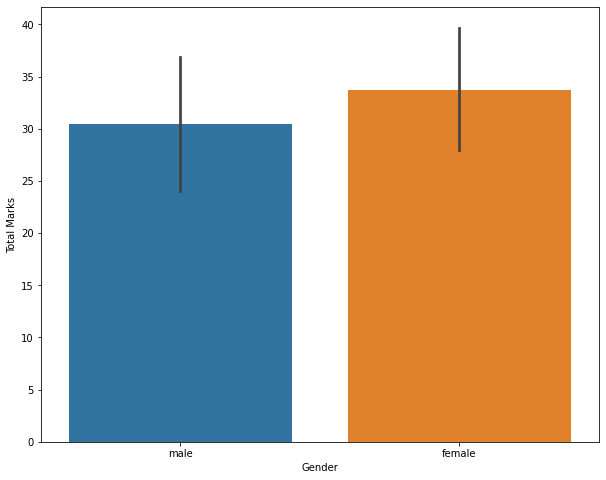

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(x="Gender",y="Total Marks",data=data)
plt.show()

In [13]:
pd.qcut(data['Total Marks'], q=4).value_counts()

(11.999, 22.5]    7
(22.5, 33.0]      7
(33.0, 43.25]     7
(43.25, 50.0]     7
Name: Total Marks, dtype: int64

Insight:

As per this table,7 students fell in the top 25 % range with a score of 43.25 to 50.


In [14]:
#count of students who took  Test preparation 
data1=data['Test preparation'].value_counts()
data1

none         21
completed     7
Name: Test preparation, dtype: int64

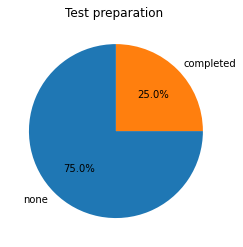

In [15]:
#pie plot-Shows how many students took test preparation 
plt.title("Test preparation ")
plt.pie(data1,labels=data1.index, autopct='%1.1f%%', startangle=90)
plt.show()

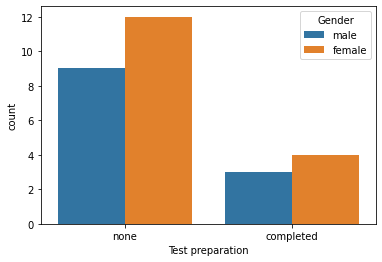

In [16]:
#Count plot-Gender wise Test preparation participation count 
sns.countplot(x='Test preparation',data=data,hue='Gender')
plt.show()

In [17]:
data.groupby('Test preparation').describe()

Total Marks                                                \
                       count       mean        std   min   25%   50%   75%   
Test preparation                                                             
completed                7.0  44.571429   3.359422  40.0  43.0  44.0  46.0   
none                    21.0  28.238095  11.661495  12.0  18.0  27.0  38.0   

                        
                   max  
Test preparation        
completed         50.0  
none              48.0

In [18]:
#count of gender wise who participated in Test Preparation
data2=data.groupby('Gender')['Test preparation'].value_counts()
data2

Gender  Test preparation
female  none                12
        completed            4
male    none                 9
        completed            3
Name: Test preparation, dtype: int64

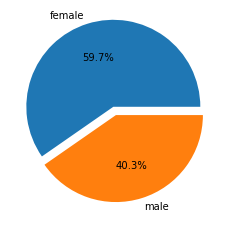

In [22]:
#pie plot -shows Gender wise participation in Test preparation
TotalMarks=data.groupby('Gender')['Total Marks'].sum()
TotalMarks
labels=['female','male']
plt.pie(TotalMarks,labels=labels,autopct='%1.1f%%',explode=[0.1,0.0])
plt.show()

In [23]:
#average of total marks w.r.t Test preparation
data.groupby('Test preparation').mean()['Total Marks'].sort_values()

Test preparation
none         28.238095
completed    44.571429
Name: Total Marks, dtype: float64

In [24]:
#average of total marks gender wise  w.r.t Test preparation
data[['Test preparation','Gender',
      'Total Marks',
      ]].groupby(['Test preparation','Gender']).mean()

Total Marks
Test preparation Gender             
completed        female    45.250000
                 male      43.666667
none             female    29.916667
                 male      26.000000

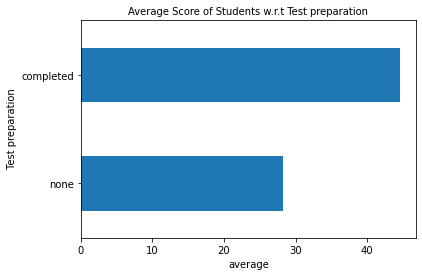

In [25]:
data.groupby('Test preparation').mean()['Total Marks'].sort_values().plot(kind='barh')
plt.title("Average Score of Students w.r.t Test preparation",fontsize=10,)
plt.xlabel("average",fontsize=10)
plt.ylabel(" Test preparation",fontsize=10)
plt.show()

Insights :

    The highest mark obtained is 50 and is secured by a female student who has completed the test preparation.
    The proportion of females is slightly higher than the males.
    The average mark obtained by females is slightly higher than males.
    The students who has completed the preparation is seen to score higher marks.



#### 2. Check whether female and male students scored the same marks.

Here, we are comparing the means of two samples taken from the two independant population - males and females.

Hypothesis    

             Null Hypothesis (H0)- female and male students scored the same marks

             Alternate Hypothesis (H1) - female and male students doesn't scored the same marks


From the alternate hypothesis(H0≠H1), we get that it is a 2-tailed t-test

Also sample is less than 30

so Test we use is - Two tailed two sample T-Test

So, we find the test statistic t and p value If the p value is less than the siginificance level of alpha= 0.05, then we reject the null hypothesis H0.

Significance level=0.05

In [27]:
data.groupby('Gender').mean()

,Total Marks
Gender,
female,33.750000
male,30.416667


In [28]:
male = data[data['Gender']=='male']
female = data[data['Gender']=='female']

In [35]:
# T-Test
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(female['Total Marks'],male['Total Marks'])
print('t-value:',ttest,'p-value:',pval)

t-value: 0.6940885268848668 p-value: 0.4937822317960763


In [36]:
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

we accept null hypothesis


**Conclusion :**

p value = 0.4937822317960763  is greater than the significance level alpha=0.05

Null hypothesis is proved

i.e 

**the scores of males and females are the same**

#### 3. Whether test preparation helps the students?

Here, we are testing the means of same group at different times so independant sample t-test is used.

        the null hypothesis      H0: Test preparation does not help

        the alternate hypothesis H1: Test preparation help (i.e,the total marks obtained after preparation is
                                                                 more than the marks obtained before it).


The alternate hypothesis states that it is a 1-tailed test

Significance level=0.05

In [39]:
# One Tailed T-Test
prepared=data[data['Test preparation']=='completed']['Total Marks']
unprepared=data[data['Test preparation']=='none']['Total Marks']
t_test,p_val=scipy.stats.ttest_ind(prepared,unprepared,alternative='greater')
print('t-value:',t_test,'p-value:',p_val)

t-value: 3.6143637527769217 p-value: 0.0006335646228660053


In [40]:
if p_val <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

we reject null hypothesis


**Conclusion :**

p value=0.0006335646228660053 which is less than the significance level alpha=0.05. So we reject the null hypothesis H0. 

i.e

**The test preparation helps the students gain higher marks.**



___________

`submitted by -
(Group  11)
Shilpa Shibu
Sreelekshmi M K
Roopa Thomas
Kevin M`